Nu testar vi att lägga till x1 * x2 istället

In [2]:
import pandas as pd

data_path = ""

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import numpy as np
test_df=pd.DataFrame(adv[:10])
train_df=pd.DataFrame(adv[10:160])
val_df=pd.DataFrame(adv[160:])


X_test = np.column_stack([np.ones(10), test_df['TV'], test_df['radio'], test_df['TV']*test_df['radio']])
Y_test = test_df['sales']

X_train = np.column_stack([np.ones(150), train_df['TV'], train_df['radio'], train_df['TV']*train_df['radio']])
Y_train = train_df['sales']

X_val = np.column_stack([np.ones(40), val_df['TV'], val_df['radio'], val_df['TV']*val_df['radio']])
Y_val = val_df['sales']

Y = adv['sales']        #responsvektor
X = np.column_stack([np.ones(Y.shape[0]), adv['TV'], adv['radio'], adv['TV']*adv['radio']])    #designmatris
X

array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 8.697780e+03],
       [1.000000e+00, 4.450000e+01, 3.930000e+01, 1.748850e+03],
       [1.000000e+00, 1.720000e+01, 4.590000e+01, 7.894800e+02],
       [1.000000e+00, 1.515000e+02, 4.130000e+01, 6.256950e+03],
       [1.000000e+00, 1.808000e+02, 1.080000e+01, 1.952640e+03],
       [1.000000e+00, 8.700000e+00, 4.890000e+01, 4.254300e+02],
       [1.000000e+00, 5.750000e+01, 3.280000e+01, 1.886000e+03],
       [1.000000e+00, 1.202000e+02, 1.960000e+01, 2.355920e+03],
       [1.000000e+00, 8.600000e+00, 2.100000e+00, 1.806000e+01],
       [1.000000e+00, 1.998000e+02, 2.600000e+00, 5.194800e+02],
       [1.000000e+00, 6.610000e+01, 5.800000e+00, 3.833800e+02],
       [1.000000e+00, 2.147000e+02, 2.400000e+01, 5.152800e+03],
       [1.000000e+00, 2.380000e+01, 3.510000e+01, 8.353800e+02],
       [1.000000e+00, 9.750000e+01, 7.600000e+00, 7.410000e+02],
       [1.000000e+00, 2.041000e+02, 3.290000e+01, 6.714890e+03],
       [1.000000e+00, 1.9

\begin{equation*}

\hat{\beta}= (X^TX)^{-1}X^TY

\end{equation*}


In [4]:
b = np.linalg.pinv(X_train.T @ X_train)@ X_train.T @ Y_train
k = len(b)-1   #dimension, alltså antal x, alltså 3
n = Y_train.shape[0]
SSE = np.sum(np.square(Y_val - (X_val @ b)))

var = SSE/(n-k-1)
S = np.sqrt(var)


Syy = (n*np.sum(np.square(Y_val)) - np.square(np.sum(Y_val)))/n         # först tog vi train, sedan val. kolla film 11:20.

SSR = Syy - SSE
# SSR_2=np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)  #alternativt sätt att räkna ut
# SSE = Syy - SSR

SSR, SSR_2

NameError: name 'SSR_2' is not defined

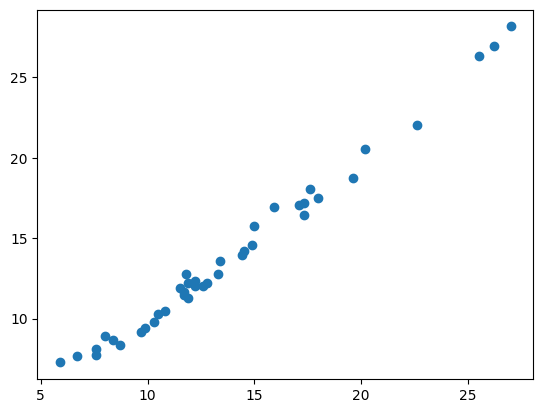

In [13]:
import matplotlib.pyplot as plt

plt.scatter(Y_val, X_val @ b)


In [7]:
b


array([6.75022020e+00, 1.91010738e-02, 2.88603399e-02, 1.08649470e-03])

In [15]:
Rsq = SSR/Syy
Rsq

# Apparently we can choose 90% as confidence level (konfidensgrad)

0.9977033993820477

In [9]:
# signifikanstest:
import scipy.stats as stats

# H0: all β = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)    # se labbinstruktion
p_significance, sig_statistic

# we reject the null-hypothesis, regression IS significant!


(1.6491013672111885e-143, 1852.17442461406)

In [25]:
# Variance/Co-variance matrix

c = np.linalg.pinv(X_train.T @ X_train)*var

# H0: b3 is irrelevant

b3_statistic = b[3] / (S*np.sqrt(c[3,3]))           # testa att ändra 3,3 till 2,2 eller 1,1 för att kolla TV eller Radio

p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
            # kolla labbhandledning
p_b3    # högt värde, b3 är troligen irrelevant

0.9166073083091348

In [ ]:
Y = adv['sales']        #responsvektor
X = np.column_stack([np.ones(Y.shape[0]), adv['TV'], adv['radio'], adv['newspaper']])    #designmatris
X

# gör om allt från början, utan newspaper!

In [6]:
RSE=np.sqrt((1/(n-2))*SSE)
RSE

0.3224165895994731

Alltså ett intervall som är 322 TV-apparater (?) brett. 

In [7]:
SSE_test = np.sum(np.square(Y_test - (X_test @ b)))
RSE_test = np.sqrt((1/(n-2))*SSE_test)
RSE, RSE_test

(0.3224165895994731, 0.27241384574815214)